# 회귀분석 HW

2020.01.14

## 목표: 대학원 합격 확률 및 합격 여부 예측

회귀: 학습 데이터로 선형 회귀, Ridge, Lasso를 학습시켜보세요.  

분류: 학습 데이터의 합격 확률을 범주형 자료로 바꿔준 후, 로지스틱 회귀를 통해 학습을 시켜보세요.  

완성된 모델로 테스트 데이터의 **합격 여부**를 예측해보세요. (합격 여부를 예측하는 것은 분류 문제입니다.)  
아래의 빈칸(코드+서술 답안)을 모두 채운 ipynb와 최종 예측을 csv로 저장하여 제출하면 됩니다.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 경고 무시
import warnings
warnings.filterwarnings(action='ignore') 

# 데이터 로드 및 확인

In [4]:
# 학습 데이터를 불러옵니다.
df = pd.read_csv("graduate_train.csv")
# 데이터 크기 확인
print('data size:', df.shape)
# 데이터 훑어보기
df.head(10)

data size: (400, 8)


GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA Research  \
0        310          105                  2  3.0   3.5  8.01       No   
1        307          105                  2  2.5   4.5  8.12      Yes   
2        329          111                  4  4.5   4.0  9.01      Yes   
3        300          105                  1  1.0   2.0  7.80       No   
4        329          114                  5  4.0   5.0  9.30      Yes   
5        300          104                  3  3.5   3.0  8.16       No   
6        318          103                  3  4.0   4.5  8.49      Yes   
7        322          110                  4  4.0   5.0  9.13      Yes   
8        315          105                  2  2.0   2.5  7.65       No   
9        332          119                  4  5.0   4.5  9.24      Yes   

   Chance of Admit   
0              0.71  
1              0.67  
2              0.81  
3              0.58  
4              0.86  
5              0.71  
6              0.71  
7              0.86  
8              0.39  
9              0.90

In [5]:
# 테스트 데이터를 불러옵니다.
test = pd.read_csv('graduate_test.csv')
test.head(10)
# 테스트 데이터에는 'Chance of Admit '이 없습니다. 이 확률을 예측해보는 것이 과제입니다.

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA Research
0        304          103                  5  5.0   4.0  8.64       No
1        297           96                  2  2.5   1.5  7.89       No
2        302          101                  2  2.5   3.5  7.96       No
3        318          112                  3  4.0   3.5  8.67       No
4        304          100                  4  1.5   2.5  7.84       No
5        330          116                  4  5.0   4.5  9.45      Yes
6        315          110                  2  3.5   3.0  8.46      Yes
7        317          107                  3  4.0   3.0  8.70       No
8        330          114                  3  4.5   4.5  9.24      Yes
9        323          111                  5  4.0   5.0  9.86      Yes

# 1. 결측치

데이터에 결측치가 있나 확인해 보세요.

In [7]:
## 코드작성
(df.isnull().sum()/len(df)*100).sort_values(ascending=False)

Chance of Admit      0.0
Research             0.0
CGPA                 0.0
LOR                  0.0
SOP                  0.0
University Rating    0.0
TOEFL Score          0.0
GRE Score            0.0
dtype: float64

Q. 데이터에 결측치가 있습니까? 어떻게 처리해 주었습니까?  
A. 없음

# 2. 범주형 변수

설명변수 중 범주형 변수가 존재하나요?  
존재한다면 어떻게 처리해주어야 할까요?  
**학습 데이터를 수정하는 경우 테스트 데이터도 그에 맞게 수정해줘야 한다는 점에 유의하세요.**

In [11]:
df.dtypes

GRE Score              int64
TOEFL Score            int64
University Rating      int64
SOP                  float64
LOR                  float64
CGPA                 float64
Research              object
Chance of Admit      float64
dtype: object

In [10]:
df_dum = pd.get_dummies(df)
df_dum.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0        310          105                  2  3.0   3.5  8.01   
1        307          105                  2  2.5   4.5  8.12   
2        329          111                  4  4.5   4.0  9.01   
3        300          105                  1  1.0   2.0  7.80   
4        329          114                  5  4.0   5.0  9.30   

   Chance of Admit   Research_No  Research_Yes  
0              0.71            1             0  
1              0.67            0             1  
2              0.81            0             1  
3              0.58            1             0  
4              0.86            0             1

Q. 어떤 변수가 범주형입니까? 어떻게 처리해 주었습니까?  
A. Research, 더미변수화

# 3. 선형회귀분석

In [29]:
# 먼저 데이터를 설명변수와 종속변수로 분리해 줍니다.
Y = df_dum['Chance of Admit ']
X = df_dum.drop('Chance of Admit ', axis=1)

In [30]:
Y.head()

0    0.71
1    0.67
2    0.81
3    0.58
4    0.86
Name: Chance of Admit , dtype: float64

In [31]:
X.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research_No  \
0        310          105                  2  3.0   3.5  8.01            1   
1        307          105                  2  2.5   4.5  8.12            0   
2        329          111                  4  4.5   4.0  9.01            0   
3        300          105                  1  1.0   2.0  7.80            1   
4        329          114                  5  4.0   5.0  9.30            0   

   Research_Yes  
0             0  
1             1  
2             1  
3             0  
4             1

In [32]:
# train과 test로 분리하여 사용하겠습니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [33]:
# 각각의 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (320, 8)
training response size: (320,)
test predictors size: (80, 8)
test response size: (80,)


### 3.1. scikit-learn으로 선형 회귀

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
# 1. 먼저 모델을 만들어 줍니다.
## 코드작성
linreg = LinearRegression()

# 2. 모델 적합시킵니다.
## 코드작성
linreg.fit(X_train, y_train)

# 3. 트레이닝셋과 테스트셋에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## 코드작성
print("Training R^2: %.2f" % linreg.score(X_train, y_train))

Training R^2: 0.83


#### 3.1.1. 모델의 MSE와 R^2를 구해봅시다.

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

In [37]:
# 4. X_test로 y_pred를 만들어줍니다.
## 코드작성

y_pred = linreg.predict(X_test)

print('MSE: %.4f' % mean_squared_error(y_test, y_pred))
print('Variance score: %.4f' % r2_score(y_test, y_pred))

MSE: 0.0040
Variance score: 0.7729


#### 3.1.2. 모델의 절편 계수를 확인해 봅시다.

In [38]:
## 코드작성
print("intercept:", linreg.intercept_)

intercept: -1.2419421437018667


Q. 절편 계수의 의미는 무엇인가요?  
A. 노이즈일 수 있음

#### 3.1.3. 모델의 기울기 계수를 확인해 보세요.

In [39]:
## 코드작성
beta = pd.DataFrame(linreg.coef_, index=X.columns, columns=['slope'])
beta.sort_values('slope')

slope
Research_No       -0.013241
GRE Score          0.001640
University Rating  0.002748
TOEFL Score        0.003606
SOP                0.007253
Research_Yes       0.013241
LOR                0.017343
CGPA               0.112079

Q. 기울기 계수의 의미는 무엇인가요? 어떤 예측변인이 대학원 합격 확률과 부적인 관계를 가지고 있으며 이것을 어떻게 해석할 수 있나요?  
A. 합격률에 영향을 미치는 파라미터, Research_No, Research가 대학원 합격 확률에 긍정적 영향을 미침

#### 3.1.4. 연속형 설명변수 중 하나를 골라 종속변수와의 관계를 산점도로 그려 보세요.

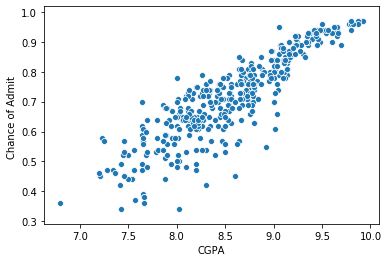

In [40]:
## 코드작성
sns.scatterplot(x="CGPA", y="Chance of Admit ", data=df)

#### 3.1.5. 범주형 설명변수와 종속변수의 관계를 boxplot으로 그려 보세요.

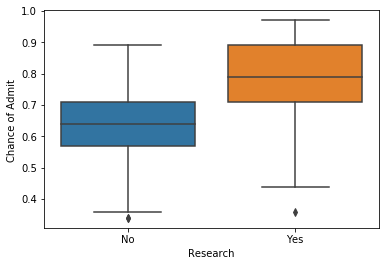

In [41]:
## 코드작성
sns.boxplot(x="Research", y="Chance of Admit ", data=df)

### 3.2. StatsModels로 선형 회귀 시행하기

In [42]:
import statsmodels.api as sm

In [43]:
## 코드작성
model = sm.OLS(y_train, X_train)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Chance of Admit    R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     211.6
Date:                Fri, 24 Jul 2020   Prob (F-statistic):          1.99e-114
Time:                        17:40:03   Log-Likelihood:                 449.18
No. Observations:                 320   AIC:                            -882.4
Df Residuals:                     312   BIC:                            -852.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
GRE Score             0.0016      0.001      2.571      0.011       0.000       0.003
TOEFL Score           0.0036      0.001      3.161      0.002       0.001       0.006
University Rating     0.0027      0.005      0.582      0.561      -0.007       0.012
SOP                   0.0073      0.006      1.273      0.204      -0.004       0.018
LOR                   0.0173      0.005      3.391      0.001       0.007       0.027
CGPA                  0.1121      0.012      9.237      0.000       0.088       0.136
Research_No          -1.2552      0.132     -9.498      0.000      -1.515      -0.995
Research_Yes         -1.2287      0.136     -9.065      0.000      -1.495      -0.962
==============================================================================
Omnibus:                       72.061   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.598
Skew:                          -1.110   Prob(JB):                     2.99e-36
Kurtosis:                       5.710   Cond. No.                     1.88e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Q. R^2와 F-statistic을 고려해 볼 때, 이 모델은 좋은 모델이라고 할 수 있을까요?  
A.있음

Q. 계수에 대한 가설 검정 결과를 바탕으로 'University Rating'과 대학원 합격률의 관계를 어떻게 해석하겠습니까?  
A.

# 4. Ridge & Lasso

이번에는 scikit-learn으로 Ridge와 Lasso를 시도해 보세요.
**가장 적절한 수준의 alpha를 찾아 모델에 적용해 보시기 바랍니다.**  
(힌트: cross-validation을 사용하세요.  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html  
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html)

In [44]:
from sklearn.linear_model import RidgeCV

# 1. 먼저 모델을 만들어 줍니다.
## 코드작성
ridge = RidgeCV(alphas=[0.1, 0.01, 1, 10, 100])

# 2. 모델에 적합시킵니다.
## 코드작성
ridge.fit(X_train, y_train)

# 3. 트레이닝셋과 테스트셋에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## 코드작성
print("Training R^2: %.2f" % ridge.score(X_train, y_train))

Training R^2: 0.83


In [45]:
from sklearn.linear_model import LassoCV

# 1. 먼저 모델을 만들어 줍니다.
## 코드작성
lasso = LassoCV(cv=5, random_state=0)

# 2. 모델에 적합시킵니다.
## 코드작성
lasso.fit(X_train, y_train)

# 3. 트레이닝셋과 테스트셋에서의 성능을 확인합니다. (이 경우 결정계수 R^2)
## 코드작성
print("Training R^2: %.2f" % lasso.score(X_train, y_train))

Training R^2: 0.82


# 5. 로지스틱 회귀분석

종속변수를 범주형 자료로 바꿔 합격확률이 아닌 **합격여부**를 예측해보겠습니다.  
**이 문제에서는 합격확률이 0.7이상이면 합격으로 판단하고 0.7미만이면 불합격으로 판단합니다.**  
(0.7이라는 숫자는 임의로 지정한 것일 뿐, 분류 문제에서 기준이 되는 threshold는 보다 더 신중하게 결정해야 합니다. 보통 default값은 0.5입니다.)

In [46]:
# 학습데이터의 종속변수인 'Chance of Admit'은 숫자형 자료로 이루어져있습니다.
df_dum.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0        310          105                  2  3.0   3.5  8.01   
1        307          105                  2  2.5   4.5  8.12   
2        329          111                  4  4.5   4.0  9.01   
3        300          105                  1  1.0   2.0  7.80   
4        329          114                  5  4.0   5.0  9.30   

   Chance of Admit   Research_No  Research_Yes  
0              0.71            1             0  
1              0.67            0             1  
2              0.81            0             1  
3              0.58            1             0  
4              0.86            0             1

In [47]:
# 종속변수인 'Chane of Admit'을 범주형 자료로 바꿔줍시다. 0.7이상은 합격(1), 0.7미만은 불합격(0)으로 지정해줍니다.
df_dum["Chance of Admit "]=df_dum["Chance of Admit "].apply(lambda x: 1 if x>=0.7 else 0)

# for문으로 할수도 있지만 웬만하면 for문은 지양하도록 합시다.
# for i in range(400):
#     df["Chance of Admit "][i] = 1 if df["Chance of Admit "][i]>=0.7 else 0

In [48]:
df_dum.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
0        310          105                  2  3.0   3.5  8.01   
1        307          105                  2  2.5   4.5  8.12   
2        329          111                  4  4.5   4.0  9.01   
3        300          105                  1  1.0   2.0  7.80   
4        329          114                  5  4.0   5.0  9.30   

   Chance of Admit   Research_No  Research_Yes  
0                 1            1             0  
1                 0            0             1  
2                 1            0             1  
3                 0            1             0  
4                 1            0             1

In [49]:
# 먼저 종속변수와 설명변수를 지정해줍니다.
Y = df_dum["Chance of Admit "]
X = df_dum.drop("Chance of Admit ", axis=1)

In [60]:
# train과 test로 분리하여 사용하겠습니다.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1234)

In [61]:
# 크기 확인
print("training predictors size:", X_train.shape)
print("training response size:", y_train.shape)
print("test predictors size:", X_test.shape)
print("test response size:", y_test.shape)

training predictors size: (300, 8)
training response size: (300,)
test predictors size: (100, 8)
test response size: (100,)


In [62]:
from sklearn.linear_model import LogisticRegression

# 1. 먼저 모델을 만들어줍니다.
## 코드작성
logreg = LogisticRegression()

# 2. 모델을 적합시킵니다.
## 코드작성
logreg.fit(X_train, y_train)

# 3. 트레이닝셋에서의 성능을 확인합니다.
## 코드작성
print('Training R^2:', logreg.score(X_train, y_train))

Training R^2: 0.8233333333333334


In [63]:
# 학습된 모델로부터 대학원 합격을 예측하고 accuracy, f1-score, confusion matrix를 구해봅시다.
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# y_pred = logreg.predict(X_test)
y_pred = np.where(logreg.predict_proba(X_test)[:,1]>0.7, 1, 0) # 0.7이상은 1, 0.7미만은 0으로 예측하는 코드

print("Accuracy: %.2f" %accuracy_score(y_test, y_pred))
print("F1 score: %.2f" %f1_score(y_test, y_pred))

print("--"*20)
print("Confusion matrix", "\n")
print(pd.DataFrame(confusion_matrix(y_test, y_pred)))

Accuracy: 0.80
F1 score: 0.80
----------------------------------------
Confusion matrix 

    0   1
0  40   5
1  15  40


In [64]:
# 이제 테스트 데이터를 불러와 학습한 모델로 합격 여부를 예측해봅시다.
test.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA Research
0        304          103                  5  5.0   4.0  8.64       No
1        297           96                  2  2.5   1.5  7.89       No
2        302          101                  2  2.5   3.5  7.96       No
3        318          112                  3  4.0   3.5  8.67       No
4        304          100                  4  1.5   2.5  7.84       No

In [65]:
# 테스트 데이터로 예측결과인 pred를 만들어줍니다.
## 코드작성
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80        45
           1       0.89      0.73      0.80        55

    accuracy                           0.80       100
   macro avg       0.81      0.81      0.80       100
weighted avg       0.82      0.80      0.80       100



In [66]:
# 테스트 데이터에 예측결과를 추가해줍니다.
test['Chance of Admit '] = y_pred
test.head()

GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA Research  \
0        304          103                  5  5.0   4.0  8.64       No   
1        297           96                  2  2.5   1.5  7.89       No   
2        302          101                  2  2.5   3.5  7.96       No   
3        318          112                  3  4.0   3.5  8.67       No   
4        304          100                  4  1.5   2.5  7.84       No   

   Chance of Admit   
0                 0  
1                 0  
2                 1  
3                 1  
4                 0

In [67]:
# 예측된 결과를 csv로 저장해줍니다. ipynb파일과 csv파일을 압축해서 올려주시면 됩니다. 수고하셨습니다.
test.to_csv('prediction.csv',index=False)